<a href="https://colab.research.google.com/github/YinterestingProjects/human-wildlife-interactions/blob/main/reports/pyCaret_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook generates a large number of standard classifiers and compares their performance.

### Imports

In [2]:
# uncomment if you need to install
# !pip install pycaret

In [3]:
import pycaret
pycaret.__version__

'3.0.0'

In [4]:
import pandas as pd
pd.__version__

'1.5.3'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read in the data

In [8]:
# you will need to update this path to reflect where your data is stored
path = '/content/drive/MyDrive/MADS_Capstone/data/classifier_video_data'

train = pd.read_csv(f'{path}/train_mat.csv').drop('Unnamed: 0', axis=1)
test = pd.read_csv(f'{path}/test_mat.csv').drop('Unnamed: 0', axis=1)
val = pd.read_csv(f'{path}/val_mat.csv').drop('Unnamed: 0', axis=1)


data = pd.concat([train, val], ignore_index=True)
data = train
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152
0,-1.092736,1.297852,-0.577338,0.397512,0.513120,0.139577,0.213303,-0.020161,0.397878,0.321120,...,-0.289965,0.303760,-0.595534,-0.401129,0.183969,-0.182514,-0.540423,-0.164475,0.506636,0.0
1,0.010270,-0.379638,-0.731220,0.832701,-1.359926,0.405773,-0.346750,1.820152,-0.247874,0.213773,...,0.340728,-0.066488,0.159551,0.541616,-0.211220,0.284675,-0.077259,0.358610,0.692362,0.0
2,-0.709696,0.912165,-0.556337,0.658960,-0.146936,-0.108666,0.382781,0.386842,0.144817,0.555887,...,0.290722,-0.617135,0.013709,-1.144406,0.844303,0.422275,1.086717,-0.125576,0.042300,0.0
3,-0.051398,0.843935,-0.899119,0.298009,-0.136678,-0.153138,0.173292,0.812673,-0.586057,-0.516242,...,0.682543,0.037859,-0.328780,-0.291884,0.314689,-0.158219,0.807481,0.382074,-0.964516,0.0
4,0.365525,0.766934,-0.444885,0.132905,-0.075787,0.112231,-0.065450,0.475979,-0.044921,0.209457,...,-0.237204,-0.496570,0.048257,-0.323298,0.060618,-0.641072,0.449811,0.000837,0.102834,0.0


### Train Models

In [9]:
# import pycaret classification and init setup
random_seed = 42

from pycaret.classification import *
s = setup(data, target = '1152', session_id = random_seed)

,Description,Value
0,Session id,42
1,Target,1152
2,Target type,Binary
3,Original data shape,"(2794, 1153)"
4,Transformed data shape,"(2794, 1153)"
5,Transformed train set shape,"(1955, 1153)"
6,Transformed test set shape,"(839, 1153)"
7,Numeric features,1152
8,Preprocess,True
9,Imputation type,simple


In [10]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9202,0.8105,0.1213,0.5714,0.1896,0.1699,0.2259,61.2100
xgboost,Extreme Gradient Boosting,0.9192,0.8179,0.0974,0.4350,0.1559,0.1391,0.1828,23.0380
knn,K Neighbors Classifier,0.9166,0.7183,0.1824,0.5063,0.2638,0.2307,0.2664,0.3150
rf,Random Forest Classifier,0.9161,0.7521,0.0176,0.2000,0.0322,0.0269,0.0497,4.9590
qda,Quadratic Discriminant Analysis,0.9161,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,2.2150
et,Extra Trees Classifier,0.9161,0.7945,0.0118,0.2000,0.0222,0.0185,0.0422,1.5380
dummy,Dummy Classifier,0.9161,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2430
lightgbm,Light Gradient Boosting Machine,0.9156,0.7991,0.0485,0.3333,0.0832,0.0700,0.1061,16.7340
ada,Ada Boost Classifier,0.9008,0.7815,0.1695,0.2698,0.2078,0.1638,0.1668,12.1620
lr,Logistic Regression,0.8875,0.7848,0.2732,0.3070,0.2873,0.2268,0.2281,1.3980


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [11]:
baseline_model_results = pull()

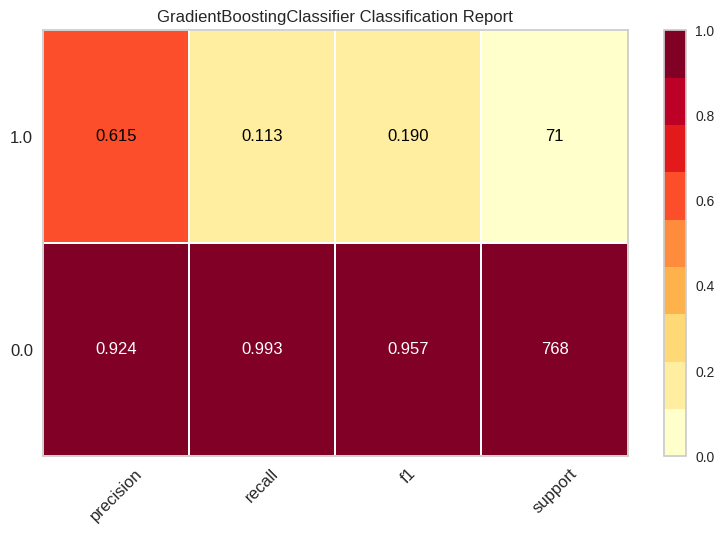

In [12]:
# plot 
plot_model(best, plot = 'class_report')

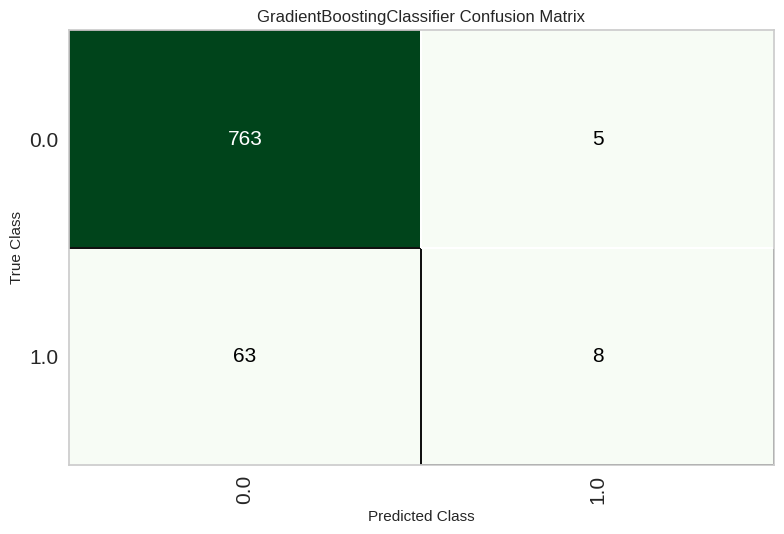

In [13]:
# Plotting the confusion matrix
plot_model(best,plot='confusion_matrix')

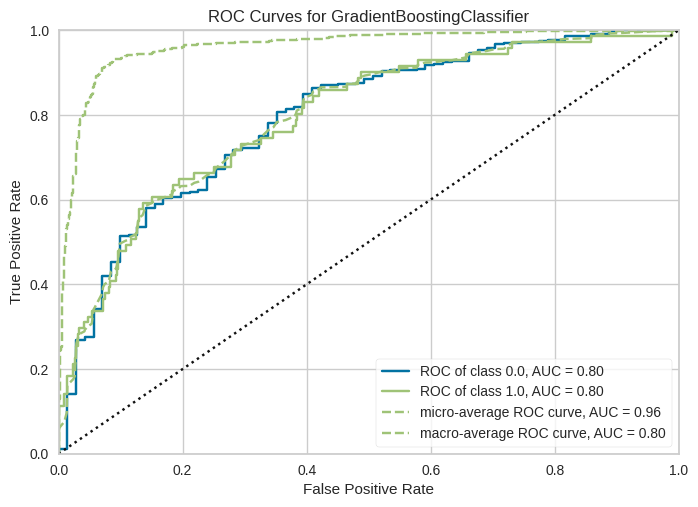

In [14]:
# plot AUC
plot_model(best, plot = 'auc')

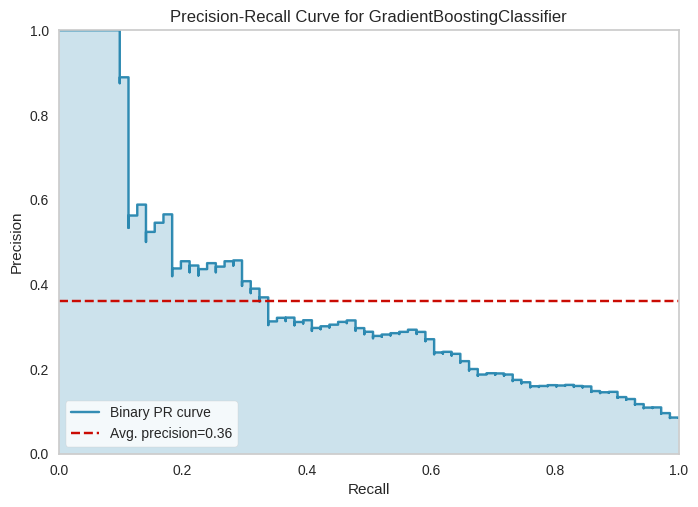

In [15]:
plot_model(best, plot = 'pr')

### Test on Balanced Dataset

In [ ]:
#fix_imbalance will automaticaaly fix the imbalanced dataset by oversampling using the SMOTE method.

In [16]:
s2 = setup(data, target = '1152', fix_imbalance=True, session_id = random_seed)

,Description,Value
0,Session id,42
1,Target,1152
2,Target type,Binary
3,Original data shape,"(2794, 1153)"
4,Transformed data shape,"(4421, 1153)"
5,Transformed train set shape,"(3582, 1153)"
6,Transformed test set shape,"(839, 1153)"
7,Numeric features,1152
8,Preprocess,True
9,Imputation type,simple


In [17]:
best_SMOTE = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9192,0.7877,0.1393,0.5414,0.2166,0.1918,0.2427,2.9210
rf,Random Forest Classifier,0.9177,0.8196,0.1640,0.4854,0.2368,0.2082,0.2442,10.3910
xgboost,Extreme Gradient Boosting,0.9171,0.8112,0.2904,0.5080,0.3580,0.3192,0.3371,52.8050
qda,Quadratic Discriminant Analysis,0.9161,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1990
dummy,Dummy Classifier,0.9161,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5810
lightgbm,Light Gradient Boosting Machine,0.9151,0.8050,0.2287,0.4498,0.2933,0.2574,0.2773,21.0720
gbc,Gradient Boosting Classifier,0.9028,0.8116,0.3934,0.4214,0.3944,0.3431,0.3496,114.2220
svm,SVM - Linear Kernel,0.8803,0.0000,0.3287,0.3238,0.3173,0.2536,0.2577,0.9640
lr,Logistic Regression,0.8706,0.7751,0.3835,0.2950,0.3304,0.2608,0.2651,2.3490
ada,Ada Boost Classifier,0.8578,0.7539,0.4438,0.2713,0.3330,0.2586,0.2711,23.1910


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
SMOTE_results = pull()

### XGBoost

In [19]:
# create an Extreme Gradient Boosting model
xgboost = create_model('xgboost')
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9184,0.7267,0.0625,0.5000,0.1111,0.0947,0.1551
1,0.9031,0.8120,0.2941,0.4167,0.3448,0.2942,0.2994
2,0.9286,0.8968,0.4706,0.6154,0.5333,0.4954,0.5006
3,0.9286,0.8051,0.2941,0.7143,0.4167,0.3856,0.4291
4,0.9286,0.8265,0.4706,0.6154,0.5333,0.4954,0.5006
5,0.8872,0.8115,0.1875,0.2500,0.2143,0.1548,0.1567
6,0.9282,0.8747,0.3750,0.6000,0.4615,0.4253,0.4388
7,0.9282,0.7922,0.3125,0.6250,0.4167,0.3829,0.4092
8,0.8923,0.7147,0.0625,0.1429,0.0870,0.0390,0.0428


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8724,0.6750,0.3750,0.2857,0.3243,0.2553,0.2582
1,0.8418,0.7703,0.4706,0.2667,0.3404,0.2583,0.2718
2,0.8571,0.9113,0.5882,0.3226,0.4167,0.3431,0.3632
3,0.8929,0.8186,0.4706,0.4000,0.4324,0.3737,0.3752
4,0.8827,0.8682,0.7647,0.4062,0.5306,0.4706,0.5015
5,0.8872,0.7898,0.5000,0.3636,0.4211,0.3603,0.3659
6,0.8821,0.7978,0.5000,0.3478,0.4103,0.3471,0.3541
7,0.9026,0.8195,0.4375,0.4118,0.4242,0.3711,0.3713
8,0.8667,0.6969,0.1250,0.1429,0.1333,0.0615,0.0616


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
def ploting(model, train=False):
  plot_model(model, plot='confusion_matrix', use_train_data=train)
  plot_model(model, plot = 'class_report', use_train_data=train)
  plot_model(model, plot='confusion_matrix', use_train_data=train)
  plot_model(model, plot = 'auc', use_train_data=train)
  plot_model(model, plot = 'pr', use_train_data=train)

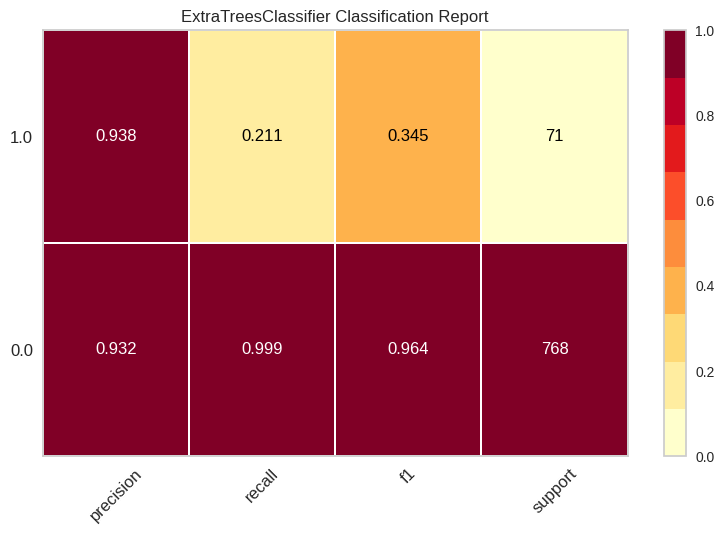

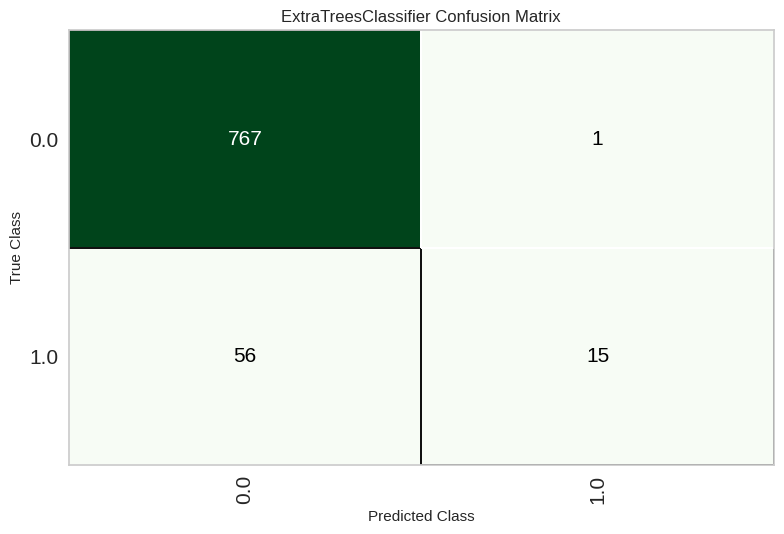

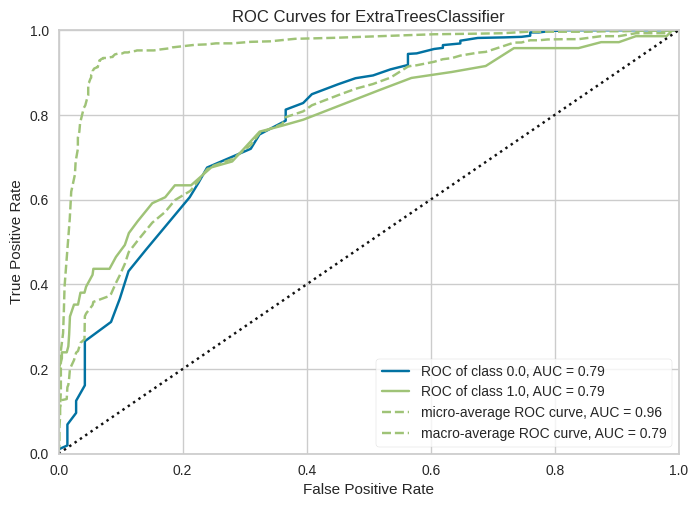

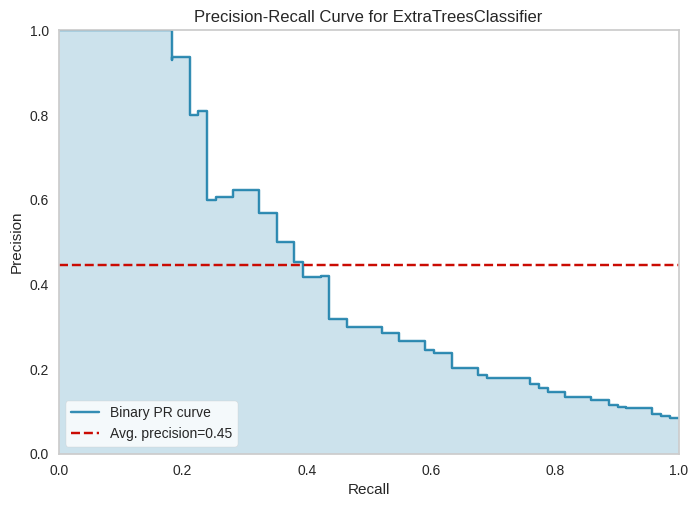

In [21]:
plot_model(best_SMOTE, plot = 'class_report')
plot_model(best_SMOTE, plot='confusion_matrix')
plot_model(best_SMOTE, plot = 'auc')
plot_model(best_SMOTE, plot = 'pr')

In [22]:
# run the same metrics as the other classifier on untuned model
# uncomment if you didn't run the previous version to save time
# xgboost = create_model('xgboost')

In [23]:
preds = xgboost.predict(test.iloc[:, :-1])
y_test = test.iloc[:, -1]

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [ ]:
# note, this isn't a completely fair comparison as we did the training on both the train and validation
# data just to see if it would do better. The answer is yes, but still not great. 

In [25]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds)
xgboost_score = xgboost.score(test.iloc[:, :-1], y_test)
roc_auc = roc_auc_score(y_test, preds)

print("Classifier: XGBoost")
print("Class 0 Precision:  {}  |  Class 1 Precision: {}".format(precision[0], precision[1]))
print("Class 0 Recall:     {}  |  Class 1 Recall:    {}".format(recall[0], recall[1]))
print("Class 0 FScore:     {}  |  Class 1 FScore:    {}".format(fscore[0], fscore[1]))
print("Class 0 Support:    {}  |  Class 1 Support:   {}".format(support[0], support[1]))
print("XGBoost Accuracy Score: {}".format(xgboost_score))
print("XGBoost ROC/AUC Score:  {}".format(roc_auc))
print(confusion_matrix(y_test,preds))

Classifier: XGBoost
Class 0 Precision:  0.9453551912568307  |  Class 1 Precision: 0.59375
Class 0 Recall:     0.9755639097744361  |  Class 1 Recall:    0.3877551020408163
Class 0 FScore:     0.960222016651249  |  Class 1 FScore:    0.46913580246913583
Class 0 Support:    532  |  Class 1 Support:   49
XGBoost Accuracy Score: 0.9259896729776248
XGBoost ROC/AUC Score:  0.6816595059076263
[[519  13]
 [ 30  19]]
